<a href="https://colab.research.google.com/github/tua2542/Practical-Exam-SO/blob/main/1_COVID_19_Saliva_Testing_SO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1: COVID-19 Saliva Testing

## Author

Sakdipat Ontoum 

sakdipat.2542@mail.kmutt.ac.th

https://tua2542.github.io/sakdipat-portfolio/


Copyright 2022 Sakdipat Ontoum

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Introduction
Coronaviruses are a broad family of viruses that have been linked to illnesses ranging from the common cold to more serious conditions such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS) (SARS. In 2019, a new coronavirus (COVID-19) was discovered in Wuhan, China. 

![Fig.1. Covid-19 ](https://liverpooljp.files.wordpress.com/2020/04/coronavirus-definition.jpg)

![Fig.2. PCR Test ](https://thethaiger.com/wp-content/uploads/2022/01/PCR_test_.jpg)

Sometimes, When PCR test resources are scarce and antigen test kits are inaccurate, clinicians look for alternate COVID-19 testing methods that can be completed in a day and handle thousands of samples. COVID-19 virus proteins should be lacking in normal people's saliva. Some distinct proteins may be produced in response to COVID-19 infection and can be utilized as a signature to identify potentially infected people. Therefore, protein profiles in a patient's saliva can indicate either he or she is infected with COVID-19.

Mass spectrometry is a method for determining the protein composition of a material. Saliva samples from hundreds of patients were studied in this dataset. So, a machine learning specialist is approached and charged with developing a machine learning model that can identify who COVID-19 infected since the PCR test cannot interpret the result completely.  


## Objective
The aim is to create a prediction model that can predict wheter a patient cases who COVID-19 infected - binary classification challenge with Semi-Supervised Learning. There is a chance that can idenfity the result which PCR test from Mass spectrometry cannot interpret, or unknown COVID-19 status. 

## Approach
This machine learning project is divided into three parts. Data Manipulation, Clustering Development, and Model Development. In term of Model deployment and operationalization, there are will not be discussed because this model will not be put to production until later.

Second, because the Saliva dataset has a high dimensionality, a t-Distributed Stochastic Neighbor Embedding (t-SNE) will be used to tackle this task for reducing the dimension. Third, Autoencoder Neutral Network are more adapted to dealing with those dataset to denosing and will have a lower demension for data visualization. There are also practical compression and decompression functionalities of a data compression with practically.

Here, we have put together an anonymized dataset of COVID-19 saliva proteins from 323 patients. Sample from each patient was reanalyzed several times to produce a total of 4,300 data points.
Ground truth PCR labels are available for 147 patients. The rest are unknown.
In term of data points, 1,632 are from confirmed positive cases, 773 are from confirmed negative cases, and 1,877 are unlabeled.

## Dataset
The anonymized dataset of COVID-19 saliva proteins is collected from Kaggle. Furthermore, there are will be separated to train the dataset and test dataset which are data already known PCR-result, and unknown with respectively.

## Performace
The data given by the reviewing committee will be utilized to validate the model's performance. Because there are no consequences for False Positive and False Negative, the model will be improved and tested for precision. Nonetheless, the ROC Curve and F1 score will be computed for reference.


# 1. Configurations

## 1.1 Install and Imports Library

All the install Library go here.

In [1]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 7.9 MB/s 
     |████████████████████████████████| 181 kB 64.1 MB/s 
     |████████████████████████████████| 145 kB 54.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=ee71792e093a5fe6ba9039fa012f6674edd19a2a8b1b4351079e60ff2956b675
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


All the imports go here.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import wandb

from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, log_loss, precision_recall_fscore_support
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.utils import resample

from scipy import stats
from scipy.stats import norm

## 1.2 Mount Google Drive and Wandb Authenication

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## 1.4 Global Settings

There variabls will be used across the project.

In [5]:
#Training Settings
BATCH_SIZE = 512
EPOCH = 50
VALIDATION_SIZE = 0.2
TEST_SIZE = 0.25
#Dataset
saliva_dataset = '/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/anonymized_COVID-19_MS_dataset_041822.csv'

#wandb
wandb.init(project="COVID-19-Saliva-Testing", entity="kratua2542")

wandb: Currently logged in as: kratua2542. Use `wandb login --relogin` to force relogin


# 2. Dataset Manipulation and Cleaning

## 2.1 Remove Null
To Drop Rows In Pandas DataFrames With NaN Values In Certain Columns.

In [6]:
  saliva_dataframe = pd.read_csv(saliva_dataset)
  saliva_dataframe.rename(columns = {'Unnamed: 0': 'Person_ID'}, inplace = True)
  saliva_dataframe.head()

,Person_ID,Sample_ID,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
0,1,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,N6,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
saliva_dataframe_two = saliva_dataframe.fillna(0)
saliva_dataframe_two

,Person_ID,Sample_ID,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
0,1,N6,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,N6,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,N6,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,N6,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,N6,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,4278,N319,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4278,4279,N320,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4279,4280,N320,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4280,4281,N320,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.2 Label Factorization and Data Replacement 


In [8]:
## label 0 = postive class, label 1 = negative class
#Maybe Train Set
run_this = False
saliva_dataframe_mix = saliva_dataframe_two[saliva_dataframe_two['PCR_result'] != 'unknown']

if run_this:
  saliva_dataframe_mix.to_csv('/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/anonymized_COVID-19_MS_dataset_041822_mix.csv', index=False)

saliva_dataframe_mix['PCR_result'] = pd.factorize(saliva_dataframe_mix['PCR_result'])[0]
saliva_dataframe_mix['Sample_ID'] = saliva_dataframe_mix['Sample_ID'].str.replace(r'N', '')

#Maybe Test Set
saliva_dataframe_unknown = saliva_dataframe_two[saliva_dataframe_two['PCR_result'] == 'unknown']
if run_this:
  saliva_dataframe_unknown.to_csv('/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/anonymized_COVID-19_MS_dataset_041822_unknown.csv', index=False)

saliva_dataframe_unknown['PCR_result'] = pd.factorize(saliva_dataframe_unknown['PCR_result'])[0]
saliva_dataframe_unknown['Sample_ID'] = saliva_dataframe_unknown['Sample_ID'].str.replace(r'N', '')
saliva_dataframe_unknown = saliva_dataframe_unknown.drop(['Person_ID', 'Sample_ID'], axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [9]:
saliva_dataframe_mix

,Person_ID,Sample_ID,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
0,1,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,3253,172,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3253,3254,172,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3254,3255,172,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3255,3256,172,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
saliva_dataframe_mix.describe()

,Person_ID,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
count,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,...,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000
mean,1606.556757,0.321414,0.002374,0.003134,0.135498,0.006921,0.005395,0.092388,0.033551,0.009151,...,0.003866,0.001491,0.000974,0.000411,0.000163,0.000171,0.000074,0.000085,0.000085,0.000129
std,957.816671,0.467116,0.069647,0.077336,1.210441,0.116106,0.141720,0.397452,0.269671,0.126397,...,0.053591,0.037030,0.027775,0.020147,0.007972,0.008390,0.003605,0.004169,0.004169,0.006348
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,769.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2389.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3257.000000,1.000000,2.517524,3.141888,33.284754,3.776105,6.631382,6.531447,8.191807,3.028233,...,1.055768,1.142998,0.916550,0.988017,0.390968,0.411444,0.176780,0.204445,0.204445,0.311298


# 2.2 Resample Datasets
Due to handle imbalance dataset, the label 0 of train dataset is 67.86 %, it is far away from label 0 so much.  

In [11]:
vc = saliva_dataframe_mix['PCR_result'].value_counts().to_frame().reset_index()
vc['percent'] = vc["PCR_result"].apply(lambda x : round(100*float(x) / len(saliva_dataframe_mix), 2))
vc = vc.rename(columns = {"index" : "Count", "Class" : "Count"})
vc

,Count,PCR_result,percent
0,0,1632,67.86
1,1,773,32.14


In [12]:
#resample datasets
df_majority = saliva_dataframe_mix[saliva_dataframe_mix.PCR_result == 0]
df_minority = saliva_dataframe_mix[saliva_dataframe_mix.PCR_result == 1]

#Upsample minority class
df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples=1632,
                                   random_state=123)

#Combine majority class with upsampled minorirty class
saliva_dataframe_mix = pd.concat([df_majority, df_minority_upsampled])

#Display new class counts
saliva_dataframe_mix.PCR_result.value_counts()

0    1632
1    1632
Name: PCR_result, dtype: int64

In [13]:
run_this = False

if run_this:
  saliva_dataframe_mix.to_csv('/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/anonymized_COVID-19_MS_dataset_041822_mix_resampled.csv', index=False)

In [14]:
saliva_dataframe_mix = saliva_dataframe_mix.drop(['Person_ID', 'Sample_ID'], axis=1)

# 2.3 Remove Outlier
Due to the datapoint on this dataset, there is some significantly different from data points in dataset. 

In [15]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_saliva_dataframe_mix=cap_data(saliva_dataframe_mix)


capping the  PCR_result
capping the  244.17
capping the  244.38
capping the  245.48
capping the  246.44
capping the  246.69
capping the  247.36
capping the  247.99
capping the  248.21
capping the  248.6
capping the  250.4
capping the  252.06
capping the  252.42
capping the  252.66
capping the  253.01
capping the  253.22
capping the  253.47
capping the  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


253.65
capping the  253.81
capping the  254.02
capping the  254.22
capping the  254.54
capping the  254.8
capping the  254.93
capping the  255.03
capping the  255.09
capping the  256.5
capping the  258.13
capping the  258.41
capping the  258.71
capping the  258.91
capping the  259.06
capping the  260.17
capping the  261.63
capping the  261.87
capping the  262.24
capping the  263.75
capping the  265.32
capping the  265.47
capping the  265.63
capping the  265.76
capping the  265.93
capping the  266.08
capping the  266.54
capping the  268.09
capping the  269.42
capping the  269.75
capping the  270.15
capping the  270.49
capping the  270.69
capping the  270.83
capping the  272.45
capping the  274.1
capping the  274.35
capping the  274.47
capping the  274.59
capping the  274.68
capping the  274.9
capping the  275.13
capping the  275.25
capping the  275.53
capping the  276.04
capping the  276.65
capping the  277.36
capping the  277.86
capping the  278.28
capping the  278.66
capping the  278.

In [16]:
final_saliva_dataframe_mix

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.890322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1109,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1117,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
final_saliva_dataframe_mix.describe()

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
count,3264.000000,3264.0,3264.0,3264.000000,3264.0,3264.0,3264.000000,3264.000000,3264.0,3264.000000,...,3264.0,3264.0,3264.0,3264.0,3264.0,3264.0,3264.0,3264.0,3264.0,3264.0
mean,0.500000,0.0,0.0,0.097017,0.0,0.0,0.059076,0.018731,0.0,0.046563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.500077,0.0,0.0,0.533528,0.0,0.0,0.249119,0.122152,0.0,0.222753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.500000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,0.0,0.0,4.138559,0.0,0.0,1.533001,0.936885,0.0,1.441390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
final_saliva_dataframe_unknown = cap_data(saliva_dataframe_unknown)

capping the  PCR_result
capping the  244.17
capping the  244.38
capping the  245.48
capping the  246.44
capping the  246.69
capping the  247.36
capping the  247.99
capping the  248.21
capping the  248.6
capping the  250.4
capping the  252.06
capping the  252.42
capping the  252.66
capping the  253.01
capping the  253.22
capping the  253.47
capping the  253.65
capping the  253.81
capping the  254.02
capping the  254.22
capping the  254.54
capping the  254.8
capping the  254.93
capping the  255.03
capping the  255.09
capping the  256.5
capping the  258.13
capping the  258.41
capping the  258.71
capping the  258.91
capping the  259.06
capping the  260.17
capping the  261.63
capping the  261.87


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  262.24
capping the  263.75
capping the  265.32
capping the  265.47
capping the  265.63
capping the  265.76
capping the  265.93
capping the  266.08
capping the  266.54
capping the  268.09
capping the  269.42
capping the  269.75
capping the  270.15
capping the  270.49
capping the  270.69
capping the  270.83
capping the  272.45
capping the  274.1
capping the  274.35
capping the  274.47
capping the  274.59
capping the  274.68
capping the  274.9
capping the  275.13
capping the  275.25
capping the  275.53
capping the  276.04
capping the  276.65
capping the  277.36
capping the  277.86
capping the  278.28
capping the  278.66
capping the  278.82
capping the  278.92
capping the  279.25
capping the  279.58
capping the  279.77
capping the  279.93
capping the  280.08
capping the  280.38
capping the  281.96
capping the  283.47
capping the  283.56
capping the  283.6
capping the  283.74
capping the  283.93
capping the  284.17
capping the  284.36
capping the  284.66
capping the  285.01
cap

In [19]:
final_saliva_dataframe_unknown

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
209,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0,0.0,0.0,0.0,0.0,0.0,0.914284,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4278,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4279,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4280,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
final_saliva_dataframe_unknown.describe()

,PCR_result,244.17,244.38,245.48,246.44,246.69,247.36,247.99,248.21,248.6,...,15406.61,15411.6,15417.97,15468.66,16531.56,16612.52,16810.09,17207.81,18738.92,20265.36
count,1877.0,1877.0,1877.0,1877.000000,1877.000000,1877.0,1877.000000,1877.000000,1877.0,1877.000000,...,1877.0,1877.0,1877.0,1877.0,1877.0,1877.0,1877.0,1877.0,1877.0,1877.0
mean,0.0,0.0,0.0,0.137716,0.010627,0.0,0.084062,0.019887,0.0,0.039549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.517522,0.087919,0.0,0.319355,0.138352,0.0,0.198970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,3.516700,0.783598,0.0,1.912245,1.108879,0.0,1.278286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Clustering of COVID-19 Saliva Testing
## 3.1 t-distributed Stochastic Neighbor Embedding

T-SNE (t-Distributed Stochastic Neighbor Embedding) is a dataset decomposition approach that yields just the top n components with the most information.

Every dot in the graph below indicates a PCR result. The negative result is shown in green, while the positive result is shown in red. The components retrieved via T-SNE are represented by the two axes.

In [21]:
neg = final_saliva_dataframe_mix[final_saliva_dataframe_mix['PCR_result'] == 1]
pos = final_saliva_dataframe_mix[final_saliva_dataframe_mix['PCR_result'] == 0]

df = neg.append(neg).sample(frac=1).reset_index(drop=True)
X = final_saliva_dataframe_mix.drop(['PCR_result'], axis = 1).values
Y = final_saliva_dataframe_mix["PCR_result"].values

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ -5.4761963 -31.98956  ]
 [-25.68112    -6.3735385]
 [ -5.847342  -29.39455  ]
 ...
 [ 29.374708   32.892666 ]
 [ 26.237001    8.38663  ]
 [  3.9260962  72.04131  ]]


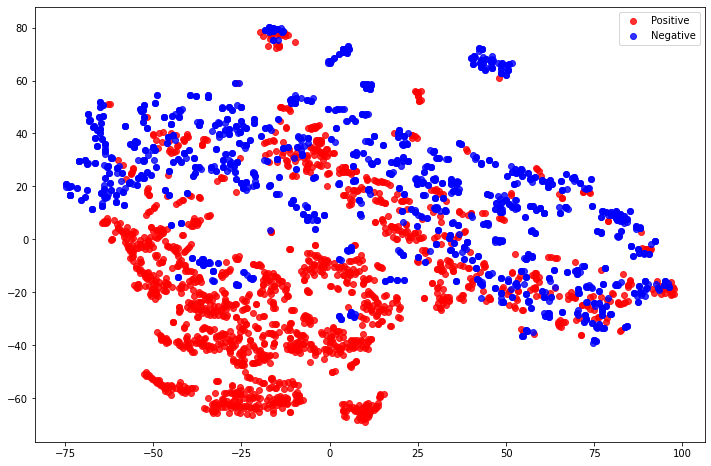

In [22]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)
    print(X_t)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Positive')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='b', linewidth='1', alpha=0.8, label='Negative')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/saliva_graph_before.png")

# 4. Autoencoders
Since the dataset are lot of noise, the autoencoders will be helped to data denosing, and reducing demension for data visulazation. Also, there is the compression and decompression functions of a data compression method with practically.

##4.1 Deep Autoencoder

In [23]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(1024, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(512, activation='relu')(encoded)

## decoding part
decoded = Dense(512, activation='tanh')(encoded)
decoded = Dense(1024, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [24]:
# This model maps an input to its reconstruction
autoencoder = Model(input_layer, output_layer)

In [25]:
x = final_saliva_dataframe_mix.drop(["PCR_result"], axis=1)
y = final_saliva_dataframe_mix["PCR_result"].values

# To Min-Max Normalization, there is help datapoints to same range. 
x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_pos = x_scale[y == 0], x_scale[y == 1]

In [26]:
# configure our model to use a per-pixel Mean squared error loss, and the Adam optimizer
autoencoder.compile(optimizer="adam", loss="mse")
history = autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = BATCH_SIZE, epochs = EPOCH, 
                shuffle = True, validation_split = VALIDATION_SIZE)

Epoch 1/50
3/3 [==============================] - 3s 428ms/step - loss: 0.0324 - val_loss: 0.0298
Epoch 2/50
3/3 [==============================] - 1s 341ms/step - loss: 0.0302 - val_loss: 0.0288
Epoch 3/50
3/3 [==============================] - 1s 339ms/step - loss: 0.0288 - val_loss: 0.0281
Epoch 4/50
3/3 [==============================] - 1s 339ms/step - loss: 0.0276 - val_loss: 0.0277
Epoch 5/50
3/3 [==============================] - 1s 344ms/step - loss: 0.0265 - val_loss: 0.0272
Epoch 6/50
3/3 [==============================] - 1s 346ms/step - loss: 0.0254 - val_loss: 0.0267
Epoch 7/50
3/3 [==============================] - 1s 521ms/step - loss: 0.0244 - val_loss: 0.0264
Epoch 8/50
3/3 [==============================] - 2s 564ms/step - loss: 0.0235 - val_loss: 0.0260
Epoch 9/50
3/3 [==============================] - 1s 342ms/step - loss: 0.0226 - val_loss: 0.0257
Epoch 10/50
3/3 [==============================] - 1s 342ms/step - loss: 0.0217 - val_loss: 0.0254
Epoch 11/50
3/3 [==

# 4.1.1 Overview of the machine learning model

In [27]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2715)]            0         
                                                                 
 dense (Dense)               (None, 1024)              2781184   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 dense_4 (Dense)             (None, 2715)              2782875   
                                                                 
Total params: 6,876,827
Trainable params: 6,876,827
Non-train

## 4.2 Hidden Representation
Hidden layers of neural networks are discussed from machine-readable data representation to feature learning. As a result, in the output layer, the output of an active hidden node is used for regression.

In [28]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [29]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000])
pos_hid_rep = hidden_representation.predict(x_pos)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ -5.665704  -33.94532  ]
 [ -6.4270763   6.653627 ]
 [ 21.669024   -4.7575145]
 ...
 [-87.14562   -39.124016 ]
 [-57.911213   23.351051 ]
 [ 74.33768   -32.22354  ]]


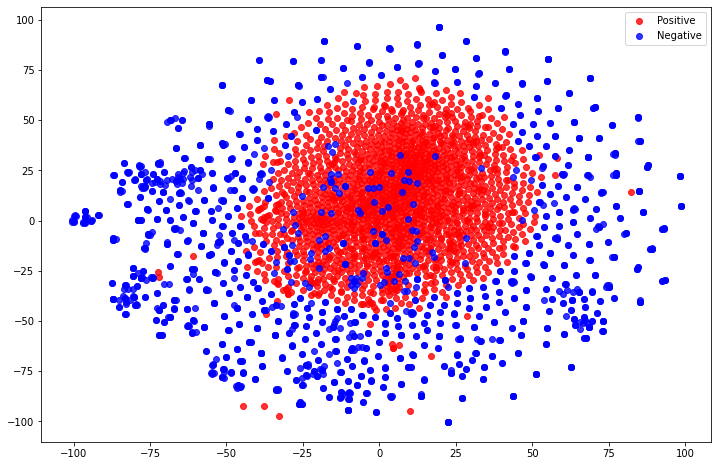

In [30]:
rep_x = np.append(norm_hid_rep, pos_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(pos_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/salica_graph_after.png")

# 5. Evaluation
The model is compared to  unknown PCR-result dataset.

In [31]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size = TEST_SIZE)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

Confusion Matrix: 


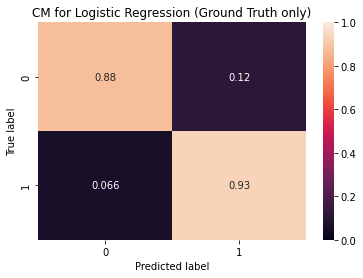

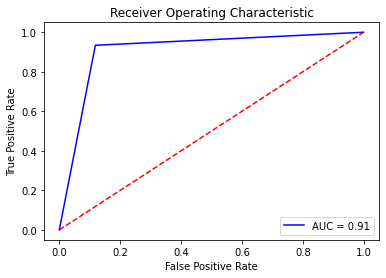


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       422
         1.0       0.88      0.93      0.91       394

    accuracy                           0.91       816
   macro avg       0.91      0.91      0.91       816
weighted avg       0.91      0.91      0.91       816


Accuracy Score:  0.9068627450980392

F-measure: 0.9069


In [32]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1., annot=True)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_ROC(x, y):
    fpr, tpr, threshold = roc_curve(x, y)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


def classifyReport(x, y):
  clf = LogisticRegression(solver="lbfgs").fit(x, y)
  pred_y = clf.predict(val_x)

  print ("Confusion Matrix: ")
  cm = confusion_matrix(val_y, pred_y)
  cm = cm / cm.sum(axis=1)[:, np.newaxis]
  plot_confusion_matrix(cm, title="CM for Logistic Regression (Ground Truth only)")    
  plt.show()

  print ("")
  plot_ROC(val_y, pred_y)

  print ("")
  print ("Classification Report: ")
  print (classification_report(val_y, pred_y))

  print ("")
  print ("Accuracy Score: ", accuracy_score(val_y, pred_y))

  print ("")
  score_2 = f1_score(val_y, pred_y, average='macro')
  print ('F-measure: {:.4f}'.format(score_2))


classifyReport(train_x, train_y)

In [33]:
# Result of model, do all data points from the same patient receive the same prediction?

temp = pd.read_csv("/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/anonymized_COVID-19_MS_dataset_041822_mix_resampled.csv")
temp = temp[["Person_ID", "PCR_result"]]
temp['PCR_test_predicted'] = [int(x) for x in clf.predict(rep_x)]
temp['PCR_result'] = temp['PCR_result'].apply(lambda x: 'neg' if x == 1 else 'pos')
temp['PCR_test_predicted'] = temp['PCR_test_predicted'].apply(lambda x: 'neg' if x == 1 else 'pos')
temp

,Person_ID,PCR_result,PCR_test_predicted
0,1,pos,pos
1,2,pos,pos
2,3,pos,pos
3,4,pos,pos
4,5,pos,pos
...,...,...,...
3259,303,neg,neg
3260,268,neg,neg
3261,1110,neg,neg
3262,1118,neg,neg


In [34]:
#้How many class are correct and incorrect ? 
correct = 0
total = temp.shape[0]

for row in temp.iterrows():
  row = row[1]
  if row['PCR_result'] == row['PCR_test_predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  3076
Incorrect:  188


In [38]:
test_x = final_saliva_dataframe_unknown.drop(["PCR_result"], axis=1)
test_y = final_saliva_dataframe_unknown["PCR_result"]

In [39]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(test_x.values)
test_x_scale = scaler.transform(test_x.values)

In [41]:
temp = pd.DataFrame(pd.read_csv("/content/drive/Shareddrives/Chula-UTC-Pract-Exam/Problem 1/anonymized_COVID-19_MS_dataset_041822_unknown.csv")['Person_ID'])
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
test_rep_x = hidden_representation.predict(test_x_scale)
y_pred = clf.predict(test_rep_x)
temp['PCR_test'] = [int(x) for x in y_pred]
temp['PCR_test'] = temp['PCR_test'].apply(lambda x: 'neg' if x == 1 else 'pos')
temp

,Person_ID,PCR_test
0,210,neg
1,211,neg
2,212,neg
3,213,neg
4,214,neg
...,...,...
1872,4278,pos
1873,4279,pos
1874,4280,pos
1875,4281,pos


# 5. Analysis

The model performs admirably, with only 220 incorrect label on the 3264 cases . I feel this model is ready for production deployment based on its 90 percent validation performance over 816 of cases in the validation set. We can guruntree that some unknown label, or testing dataset are well in to classify the PCR test. 

# 6. Conclusion

In this challenge, I created a machine learning model that can classify COVID-19 status based on mass spectrometer. Pandas and some library of Sklearn are used to manipulate the training and testing data. Also, I used Autoencoder with deep autoencoder to helped to data denosing, and reducing demension for data visulazation. In the validation set, the model has an accuracy of more than 89 percent, and it properly classifies 3044  of the 3264 cases provided by the committee.


#Appredix

Dataset that some already manipulated before remove outlier.

*   [anonymized_COVID-19_MS_dataset_041822_mix_resampled](https://drive.google.com/file/d/1Xr0t01_1DOvp0TPHA-aAGIB8nR44sA2D/view?usp=sharing)
*   [anonymized_COVID-19_MS_dataset_041822_unknown](https://drive.google.com/file/d/1-AJEn0S-dZyTBfS8_UkOEdndBlwEWyk3/view?usp=sharing)

